# baseline code 학습 후 validation 데이터 결과 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import random
import json
import cv2
from PIL import Image, ImageOps
from collections import Counter

In [2]:
img_list = glob.glob('/data/ephemeral/home/datasets/images/val/*.jpg')
len(img_list)

404

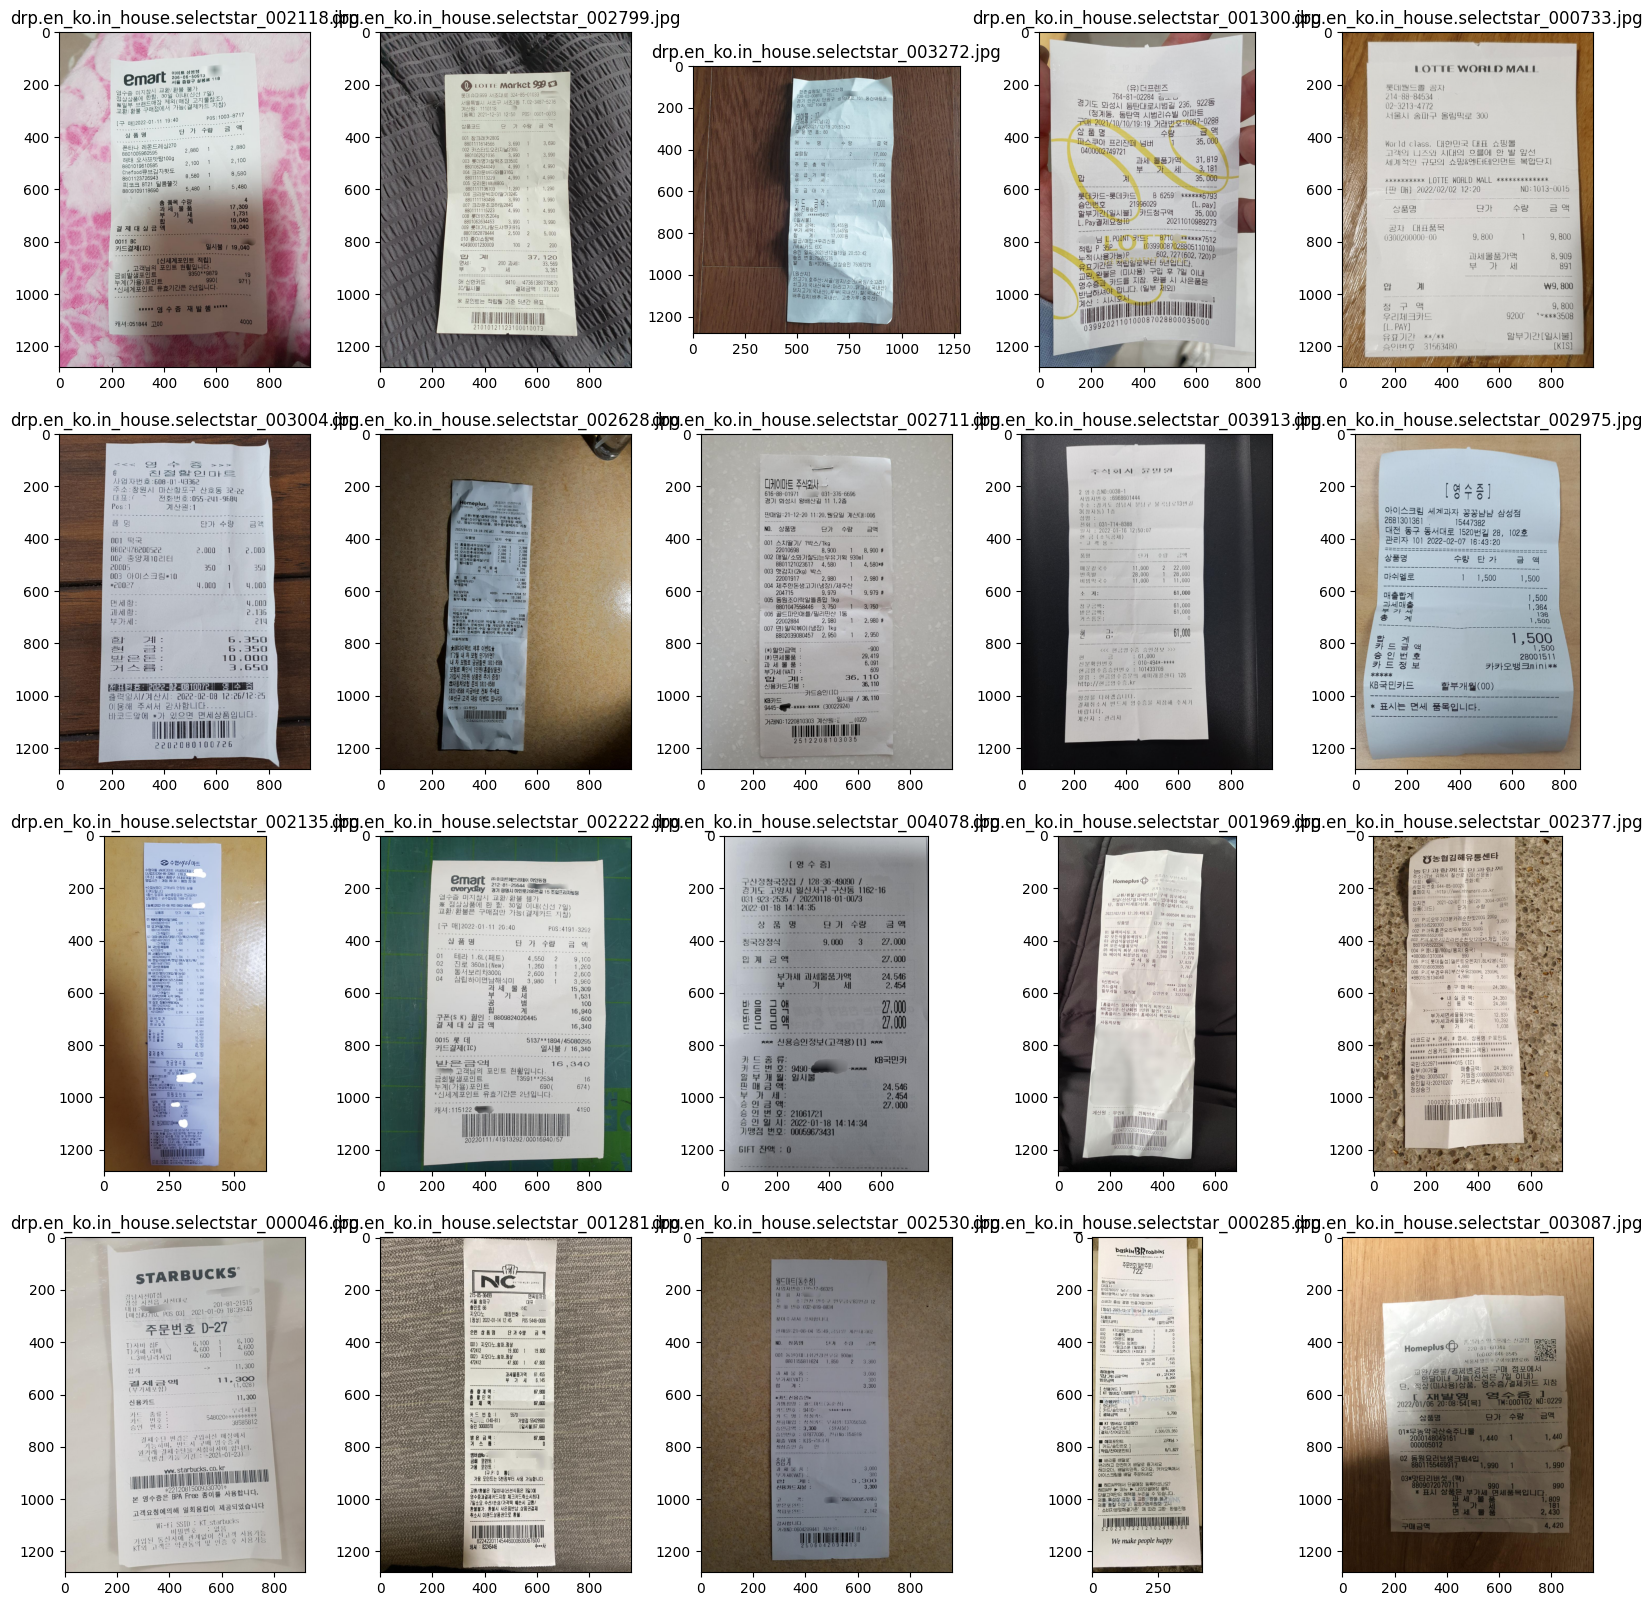

In [4]:
random.shuffle(img_list) # 매번 랜덤한 이미지 출력을 위해 셔플
plt.figure(figsize=(20, 20))

for i in range(20):
    ax = plt.subplot(4, 5, i+1)
    img_name = img_list[i].split('/')[-1]
    img = Image.open(img_list[i])
    img = ImageOps.exif_transpose(img) # 이미지 회전을 원상복구
    plt.title(img_name)
    plt.imshow(img)

# 결과 확인

In [6]:
with open('/data/ephemeral/home/baseline_code/outputs/ocr_training/submissions/baseline_val_result.json', 'r') as f:
    data = json.load(f)
    words = data['images'][img_list[0].split('/')[-1]]['words']
    for word_id, word_data in words.items():
        points = word_data.get('points', [])
        print(points)

[[210, 1102], [338, 1102], [338, 1124], [210, 1124]]
[[343, 1103], [394, 1097], [397, 1127], [346, 1133]]
[[686, 1094], [738, 1094], [738, 1118], [686, 1118]]
[[300, 1048], [362, 1048], [362, 1070], [300, 1070]]
[[404, 1044], [432, 1044], [432, 1076], [404, 1076]]
[[366, 1042], [400, 1042], [400, 1078], [366, 1078]]
[[482, 1042], [512, 1042], [512, 1072], [482, 1072]]
[[434, 1040], [468, 1040], [468, 1076], [434, 1076]]
[[518, 1040], [546, 1040], [546, 1072], [518, 1072]]
[[552, 1038], [580, 1038], [580, 1072], [552, 1072]]
[[581, 1037], [644, 1031], [647, 1061], [584, 1067]]
[[206, 972], [361, 966], [362, 994], [207, 1000]]
[[368, 966], [485, 962], [486, 990], [369, 994]]
[[488, 962], [605, 958], [606, 986], [489, 990]]
[[206, 944], [395, 938], [396, 964], [207, 970]]
[[678, 940], [734, 940], [734, 966], [678, 966]]
[[556, 936], [606, 936], [606, 960], [556, 960]]
[[208, 918], [373, 912], [374, 940], [209, 946]]
[[702, 914], [732, 914], [732, 940], [702, 940]]
[[486, 908], [605, 904],

In [7]:
def print_bbox(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_name = img_path.split('/')[-1]
    with open('/data/ephemeral/home/datasets/jsons/val.json', 'r') as gt_json:
        data = json.load(gt_json)
        words = data['images'][img_name]['words']
        for word_id, word_data in words.items():
            points = np.array(word_data.get('points', []))
            points = np.round(points).astype(np.int32).reshape((-1, 2))
            cv2.polylines(img, [points], True, color=(255, 0, 0), thickness=4)

    with open('/data/ephemeral/home/baseline_code/outputs/ocr_training/submissions/baseline_val_result.json', 'r') as f:
        data = json.load(f)
        words = data['images'][img_name]['words']
        for word_id, word_data in words.items():
            points = np.array(word_data.get('points', []))
            points = np.round(points).astype(np.int32).reshape((-1, 2))
            cv2.polylines(img, [points], True, color=(0, 255, 0), thickness=2)

    plt.figure(figsize=(10, 10))
    plt.title(img_name)
    plt.imshow(img)
    plt.show()
    

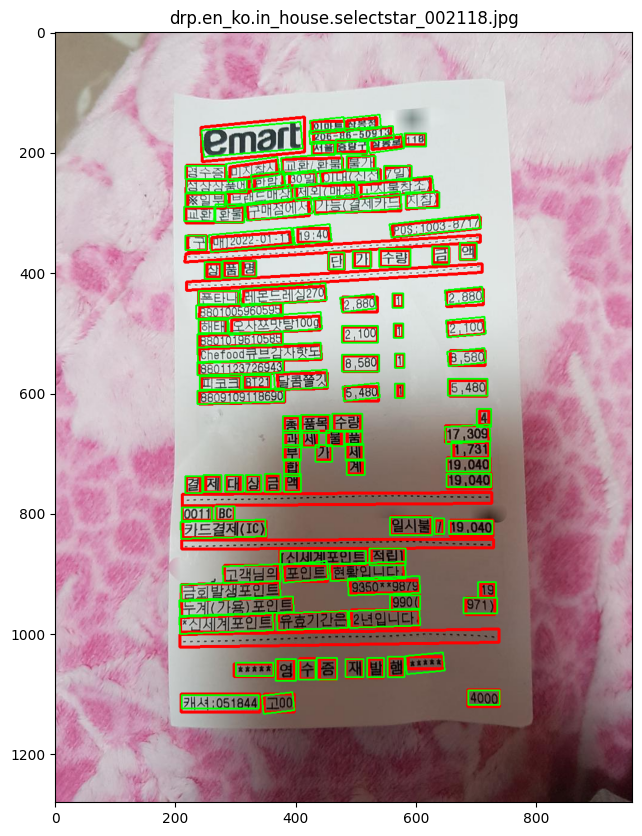

In [8]:
print_bbox(img_list[0])

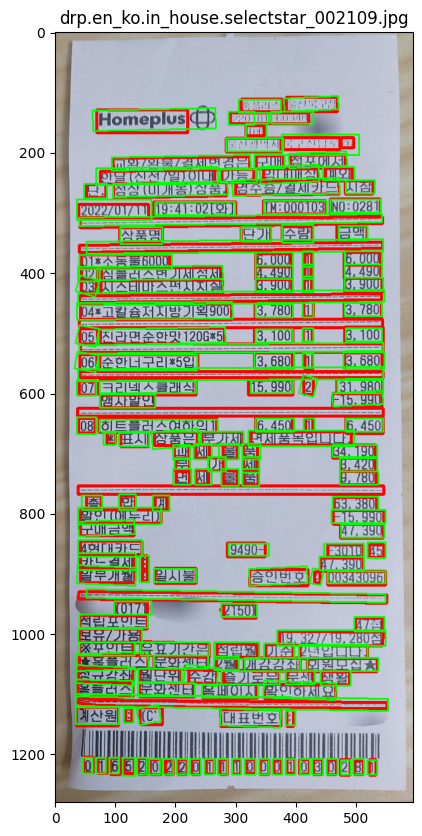

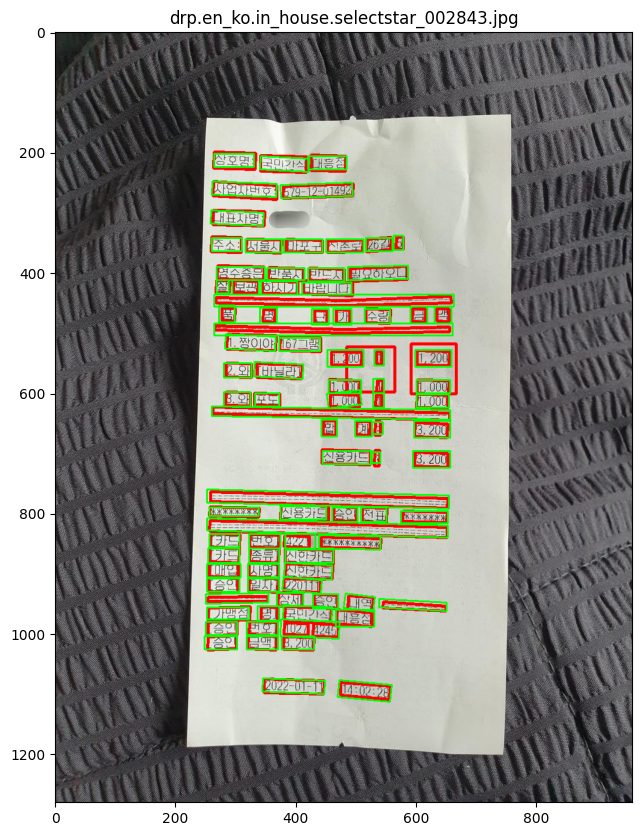

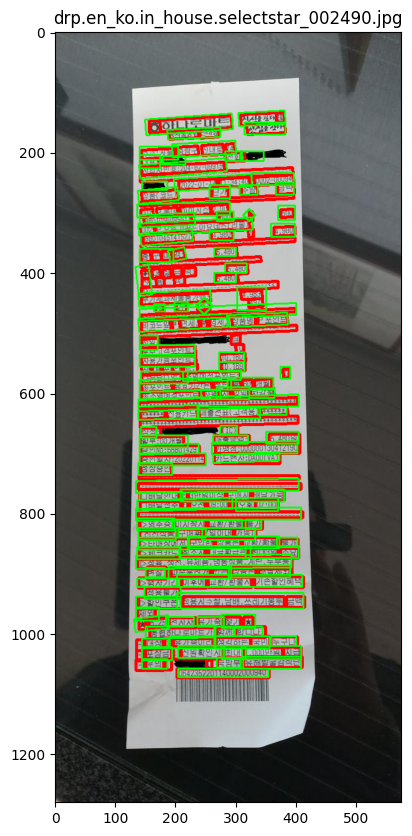

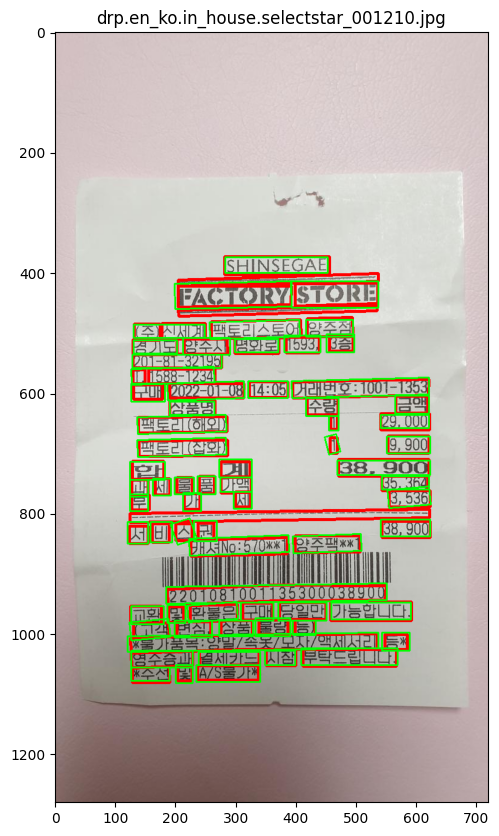

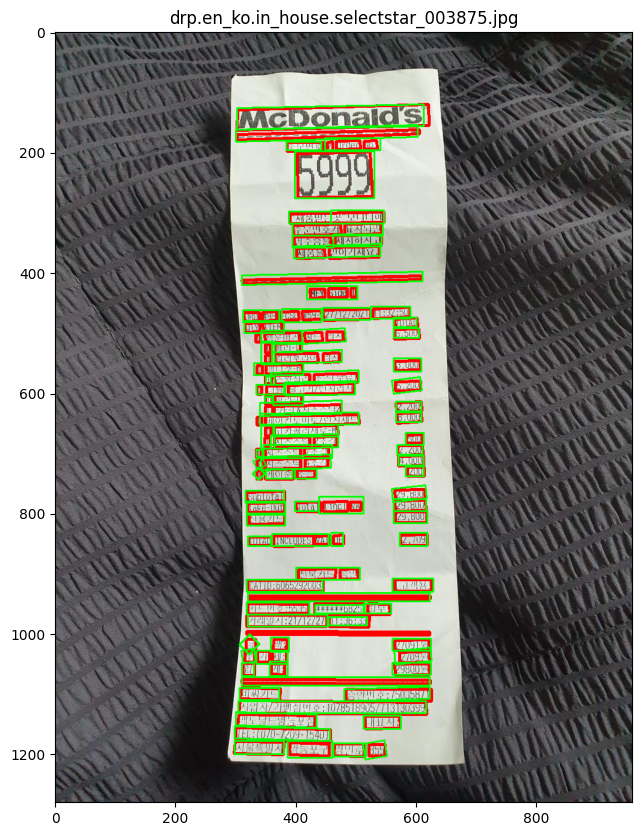

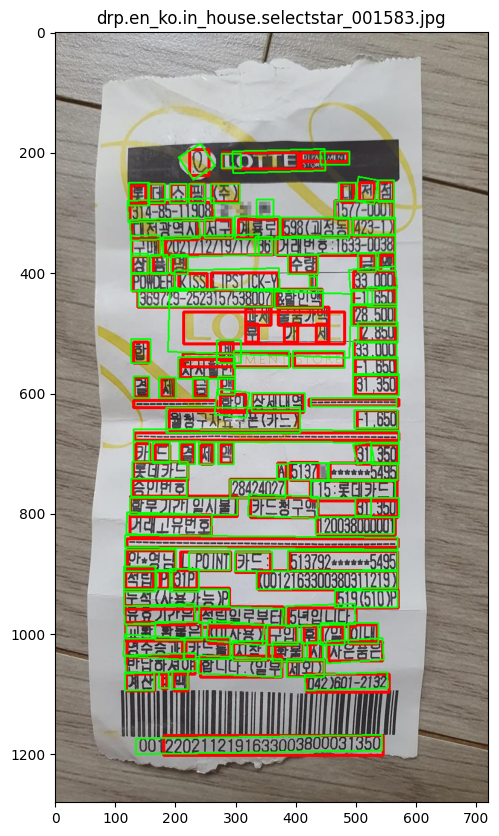

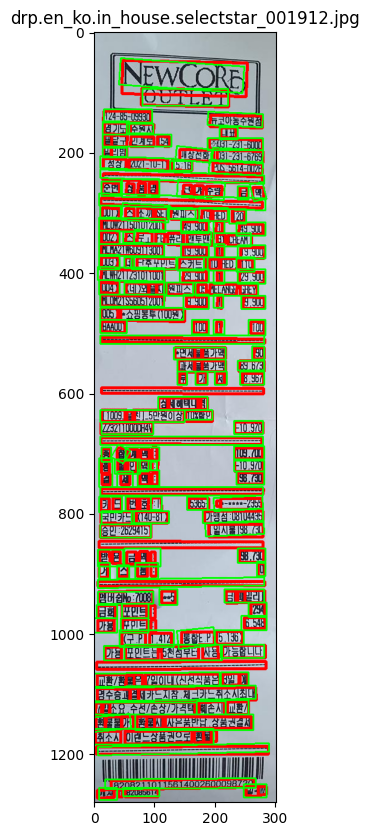

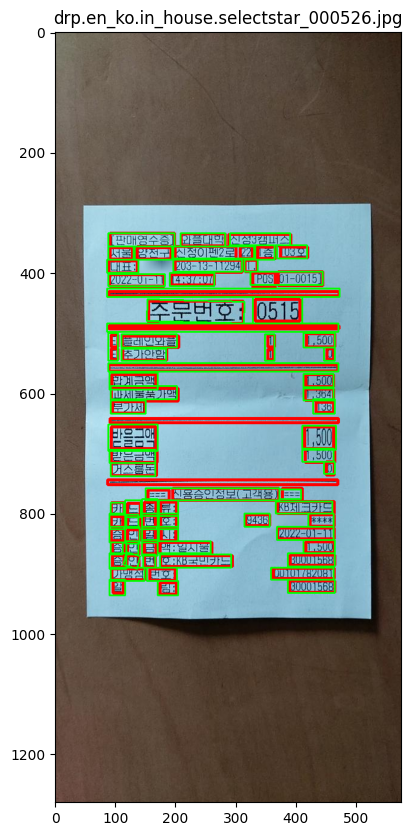

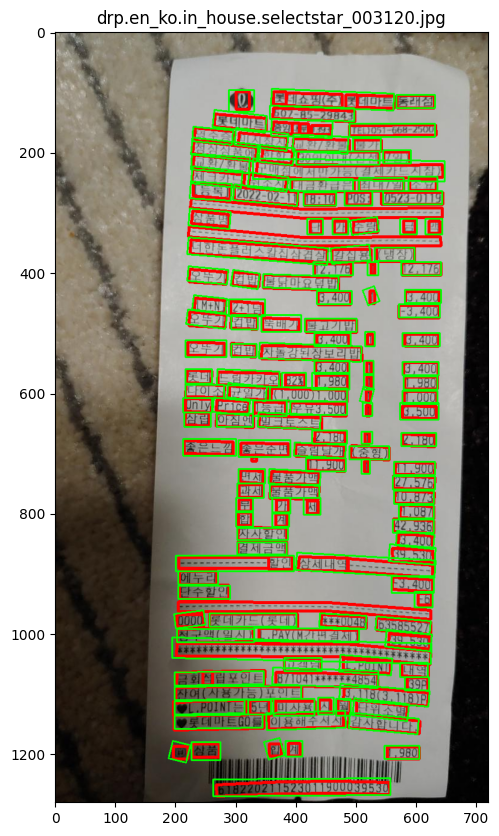

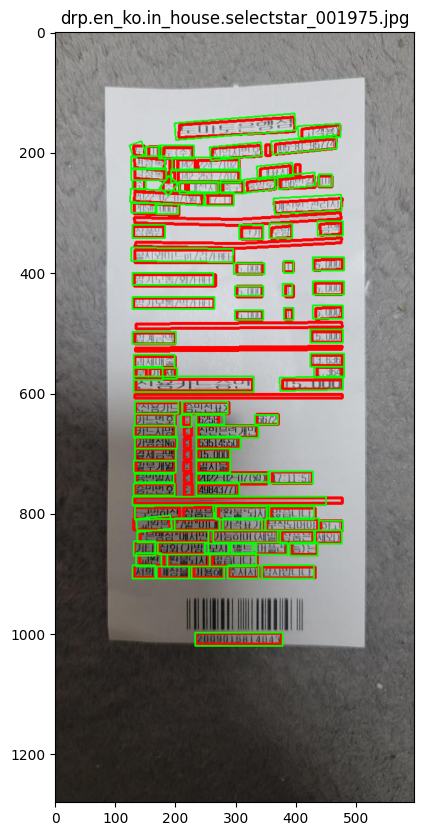

In [9]:
random.shuffle(img_list)

for i in range(10):
    print_bbox(img_list[i])